In [96]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/oyo-hotel-rooms/OYO_HOTEL_ROOMS.csv
/kaggle/input/india-gis-data/India States/Indian_states.shp
/kaggle/input/india-gis-data/India States/Indian_states.prj
/kaggle/input/india-gis-data/India States/Indian_states.dbf
/kaggle/input/india-gis-data/India States/Indian_states.shx
/kaggle/input/india-gis-data/India Boundary/India_boundary.dbf
/kaggle/input/india-gis-data/India Boundary/India_boundary.prj
/kaggle/input/india-gis-data/India Boundary/India_boundary.shx
/kaggle/input/india-gis-data/India Boundary/India_boundary.shp


# ****Data Loading

In [97]:
df=pd.read_csv('/kaggle/input/oyo-hotel-rooms/OYO_HOTEL_ROOMS.csv')
df.head(10)

,Unnamed: 0,Hotel_name,Location,Price,Discount,Rating
0,0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819.0,65% off,104.0
1,1,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702.0,65% off,410.0
2,2,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289.0,64% off,879.0
3,3,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094.0,66% off,75.0
4,4,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.0,65% off,686.0
5,5,Collection O Collection O Hotel Jayshree Domes...,"Vile Parle East, Mumbai",3127.0,65% off,588.0
6,6,OYO Hotel Blue Executive Near Chhatrapati Shiv...,"On main street, Near Saki Vihar complex, Sakin...",2772.0,65% off,1875.0
7,7,OYO Blue Pearl Residency Near Chhatrapati Shiv...,"On main street, Near Asalpha Metro Station, Gh...",1921.0,65% off,995.0
8,8,OYO Hotel Blue Sapphire Residency Near Chhatra...,"Near The Crescent Business Park, Sakinaka, Mumbai",2220.0,65% off,1144.0
9,9,OYO Hotel Blue Sea Near Chhatrapati Shivaji In...,"On main street, Near Asalpha Metro Station, Gh...",1921.0,65% off,2051.0


In [98]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [99]:
df.shape

(460, 5)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hotel_name  460 non-null    object 
 1   Location    460 non-null    object 
 2   Price       418 non-null    float64
 3   Discount    418 non-null    object 
 4   Rating      438 non-null    float64
dtypes: float64(2), object(3)
memory usage: 18.1+ KB


In [101]:
df['Discount'] = df['Discount'].str.replace('%', '').str.replace('off', '').astype(float)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hotel_name  460 non-null    object 
 1   Location    460 non-null    object 
 2   Price       418 non-null    float64
 3   Discount    418 non-null    float64
 4   Rating      438 non-null    float64
dtypes: float64(3), object(2)
memory usage: 18.1+ KB


In [103]:
df.describe()

,Price,Discount,Rating
count,418.000000,418.000000,438.000000
mean,1290.191388,67.181818,620.636986
std,550.144661,3.859704,934.922813
min,449.000000,47.000000,1.000000
25%,909.250000,65.000000,61.250000
50%,1206.000000,67.000000,266.500000
75%,1497.500000,67.000000,826.750000
max,4069.000000,86.000000,7398.000000


In [104]:
df.columns

Index(['Hotel_name', 'Location', 'Price', 'Discount', 'Rating'], dtype='object')

In [105]:
corel=df.corr()
corel

,Price,Discount,Rating
Price,1.000000,-0.484290,0.032768
Discount,-0.484290,1.000000,-0.011357
Rating,0.032768,-0.011357,1.000000


# ****Correlation of Features

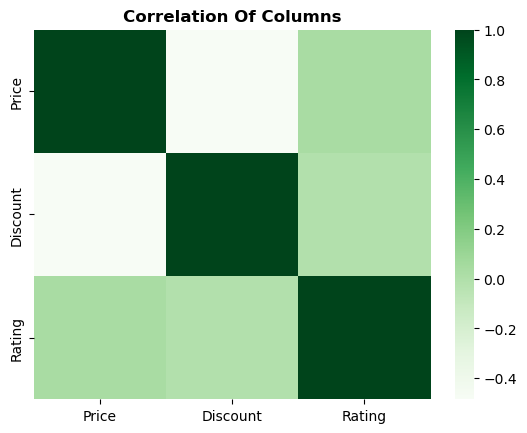

In [106]:
sns.heatmap(corel,cmap='Greens')
plt.title("Correlation Of Columns",weight='bold')
plt.show()

# ****Exploratory Data Analysis

# Relationships between numerical columns.

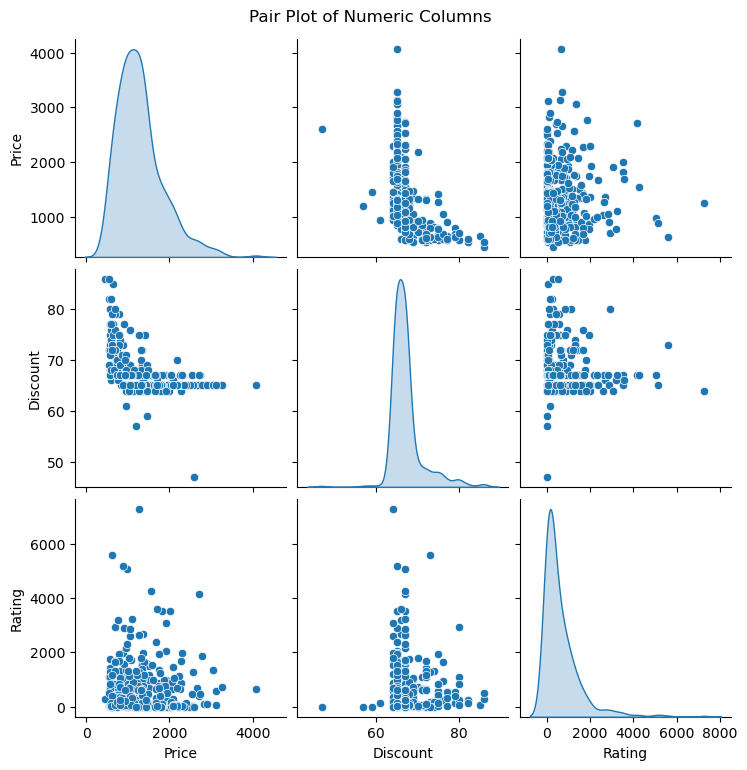

In [107]:
sns.pairplot(df.dropna(), vars=['Price', 'Discount', 'Rating'], diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)
plt.show()


# Distribution of Data

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Discount'}>],
       [<Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

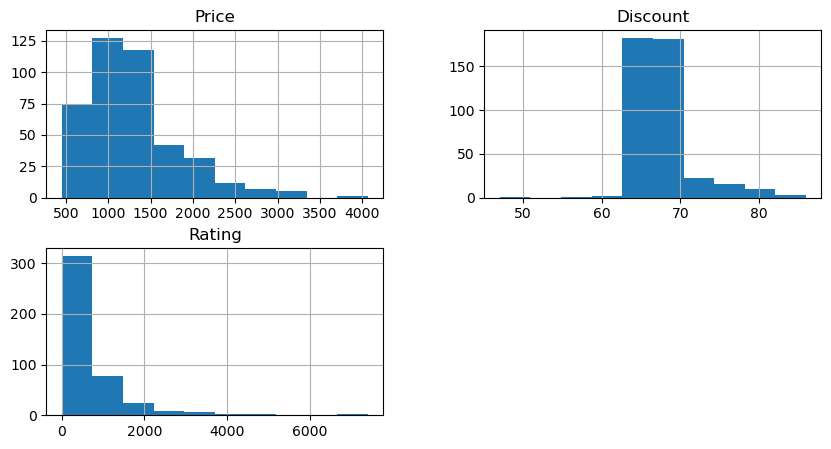

In [108]:
df[['Price', 'Discount', 'Rating']].hist(bins=10, figsize=(10, 5))


# Price based Rating 

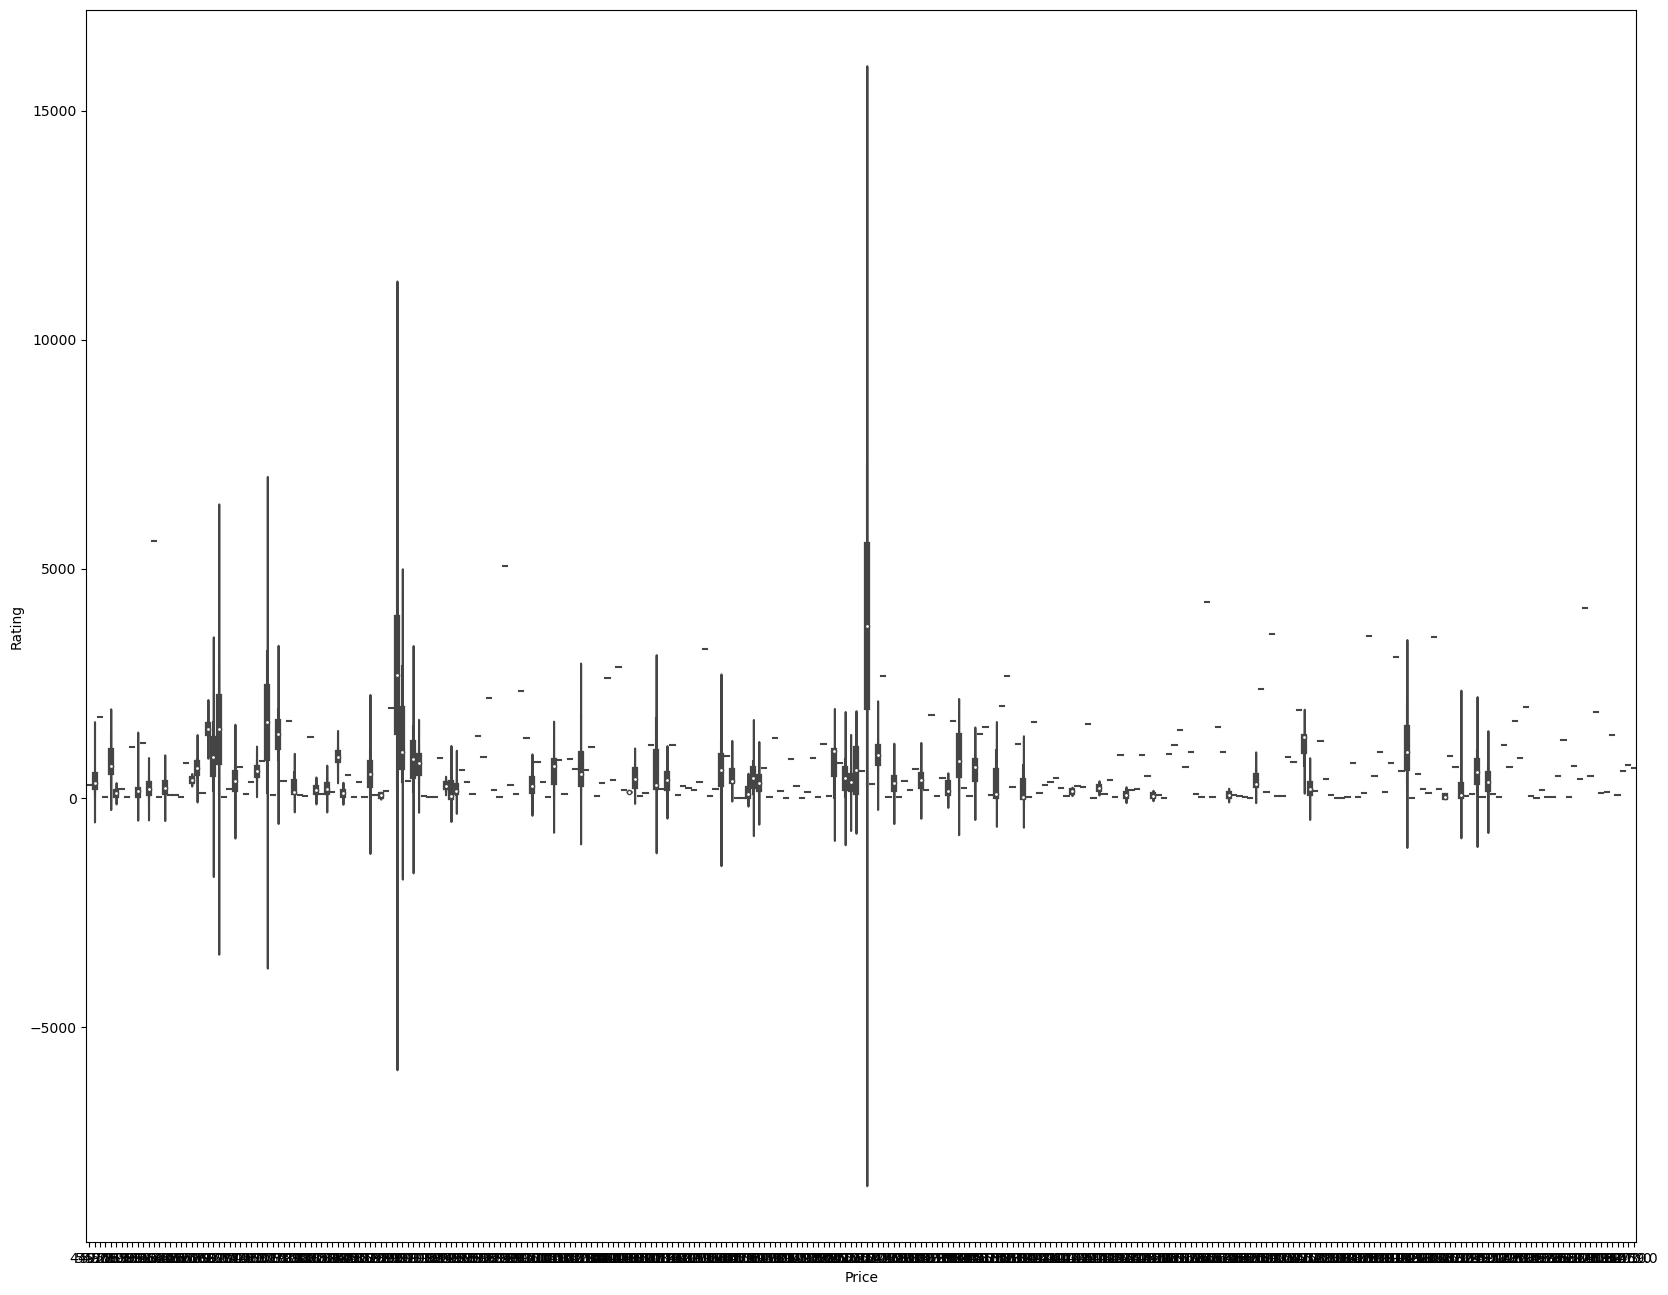

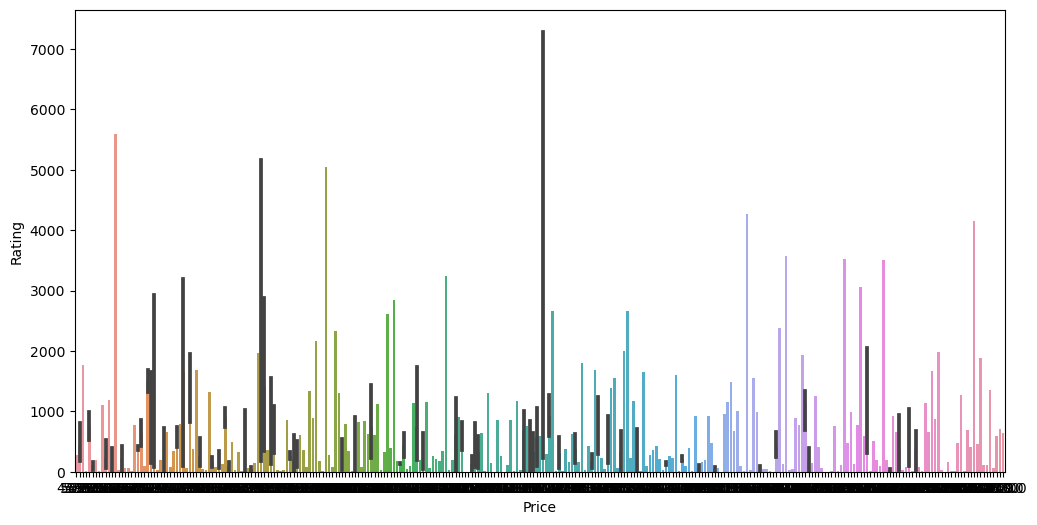

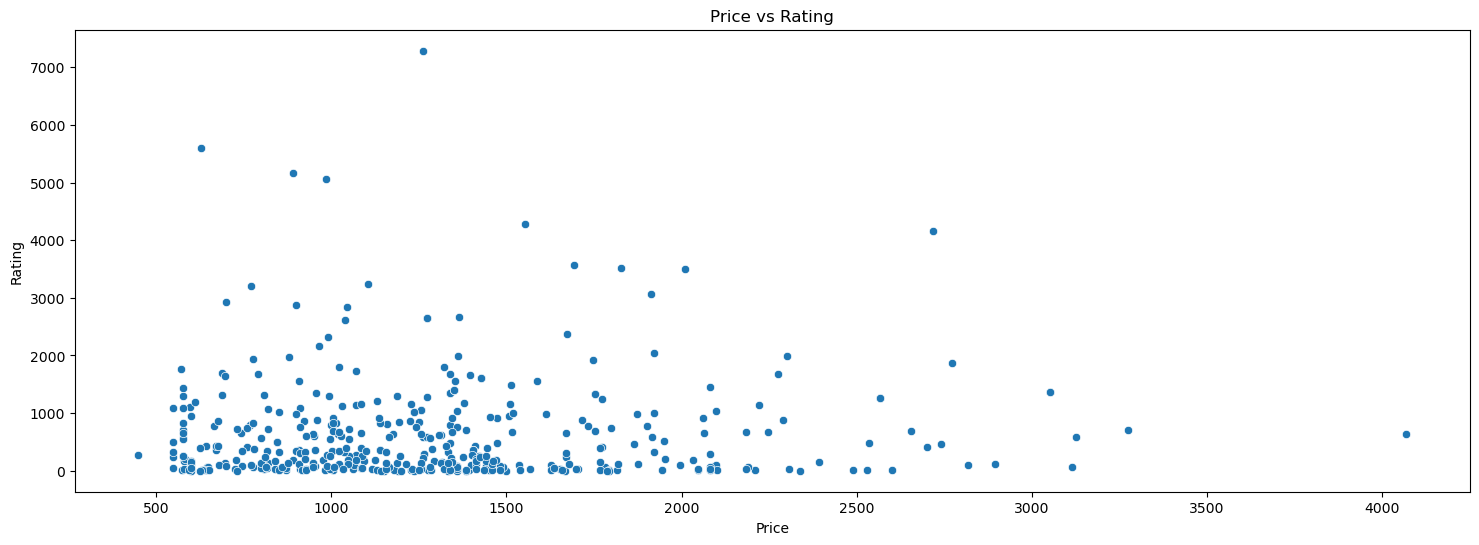

In [109]:
plt.figure(figsize=(20, 16))
sns.violinplot(data=df, x='Price', y='Rating')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Price', y='Rating')
plt.show()

plt.figure(figsize=(18, 6))
sns.scatterplot(data=df, x='Price', y='Rating')
plt.title('Price vs Rating')
plt.show()

# Box plot of Discount

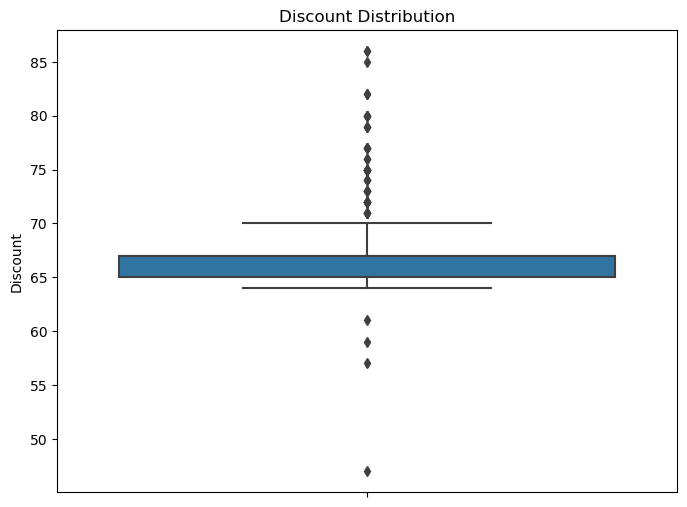

In [110]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Discount')
plt.title('Discount Distribution')
plt.show()

# Rating

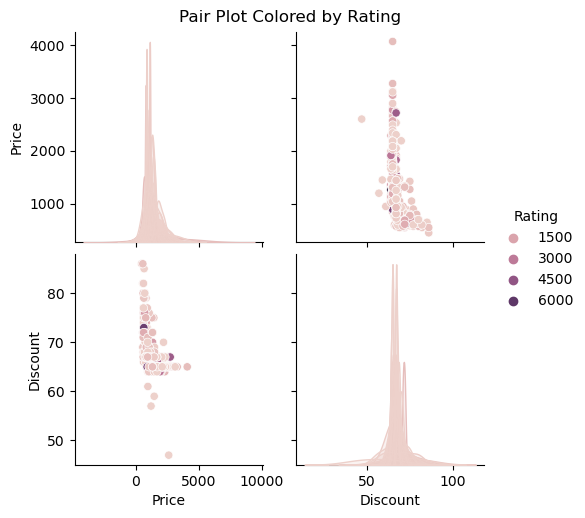

In [111]:
sns.pairplot(df, hue='Rating', diag_kind='kde')
plt.suptitle('Pair Plot Colored by Rating', y=1.02)
plt.show()

In [112]:
# Assuming 'Location' contains city names
df['City'] = df['Location'].apply(lambda x: x.split(',')[0].strip())

In [113]:
df['City'].head(10)

0                              India
1                       Chembur East
2                       Andheri East
3                       Andheri East
4         Near Asalpha Metro Station
5                    Vile Parle East
6                     On main street
7                     On main street
8    Near The Crescent Business Park
9                     On main street
Name: City, dtype: object

# Average Price by Location

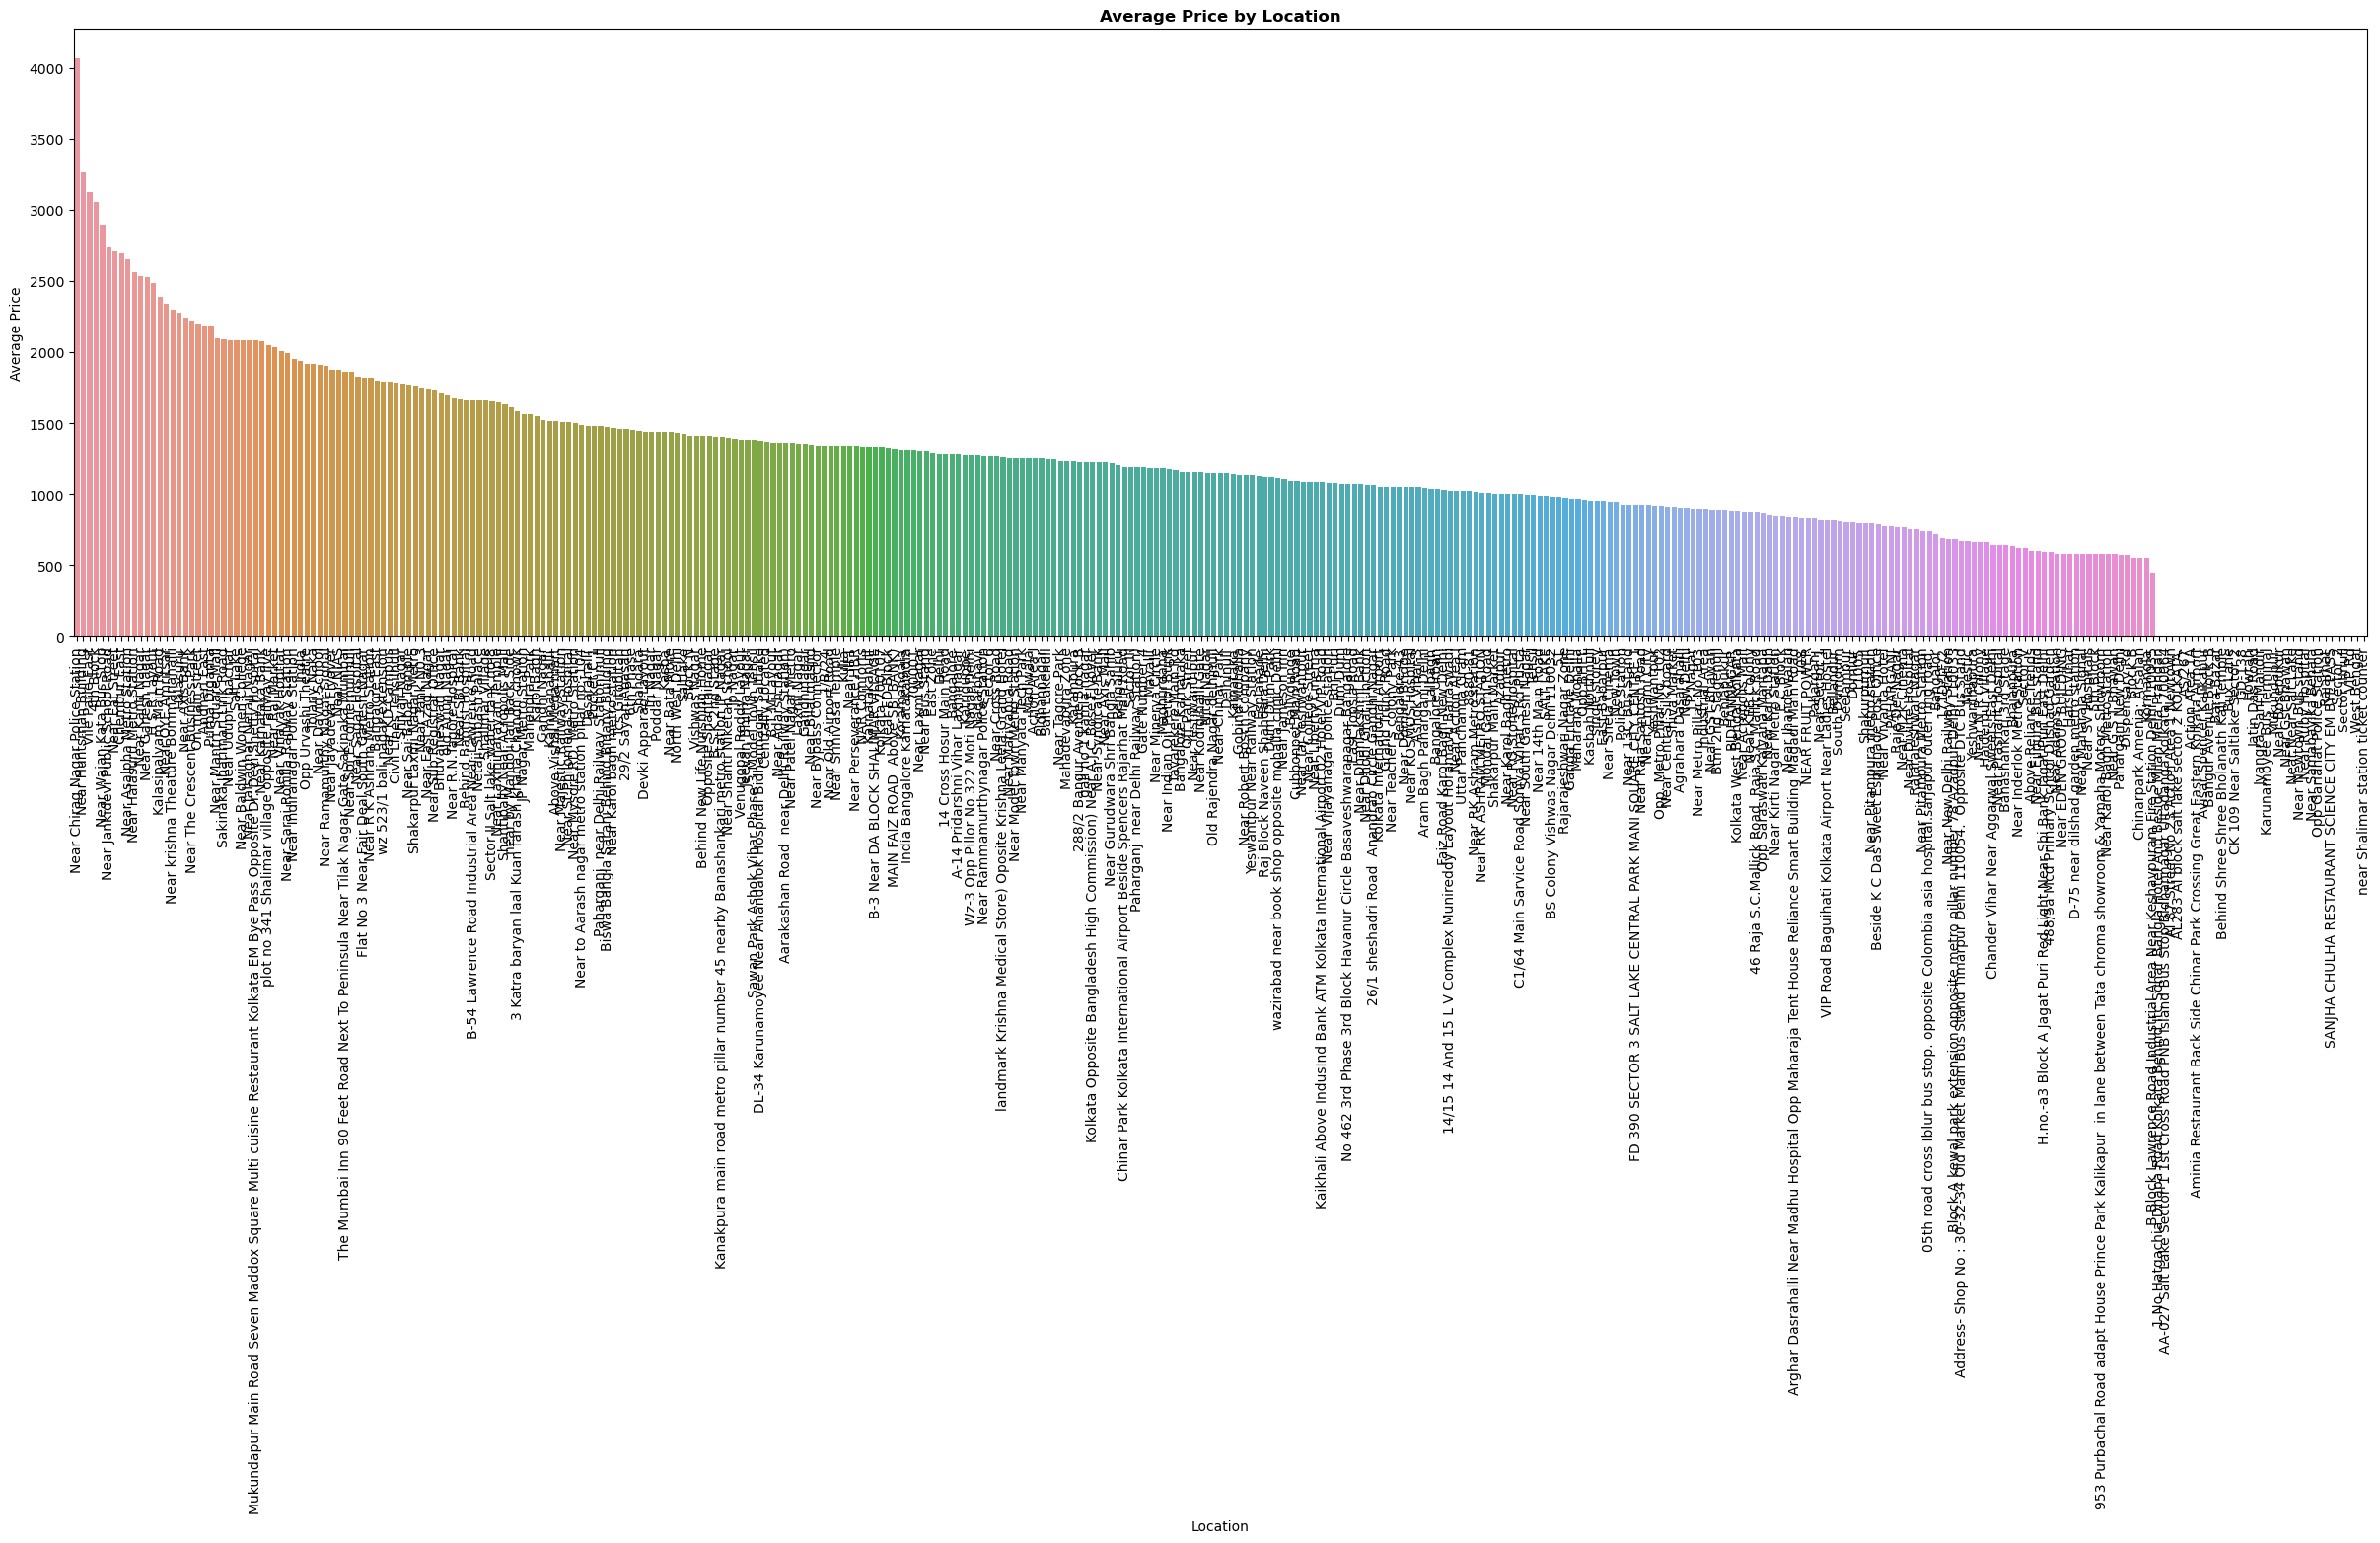

In [114]:
plt.figure(figsize=(30, 8))
avg_price_by_location = df.groupby('City')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_location.index, y=avg_price_by_location.values)
plt.title('Average Price by Location',weight='bold')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


# Average No Of Hotels by Location/City

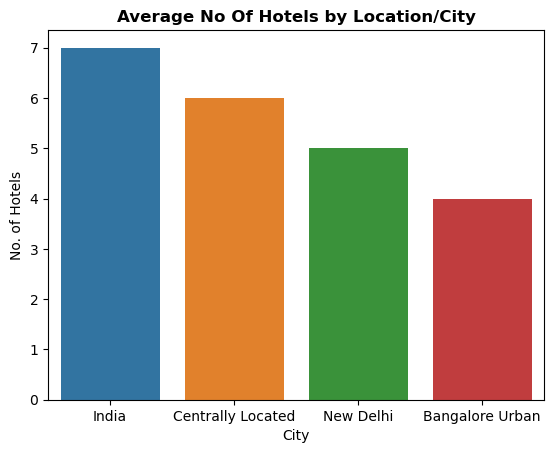

In [115]:
myplot_city = sns.barplot(x=df.City.value_counts().index[:4],y=df.City.value_counts()[:4])
myplot_city.set(xlabel='City',ylabel='No. of Hotels')
plt.title('Average No Of Hotels by Location/City',weight='bold')
plt.show()

# Banglore Hotel Prices

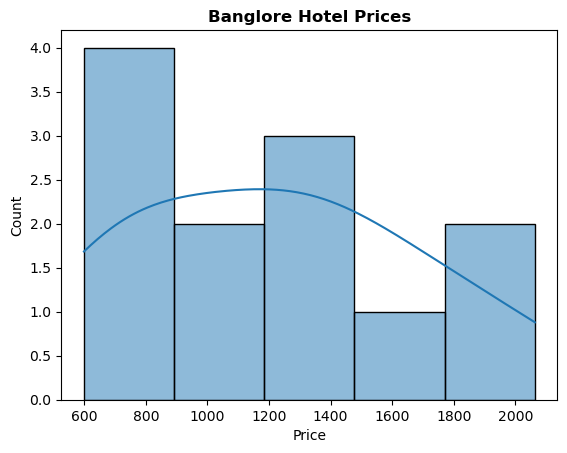

In [116]:
bng=df[df.City.str.contains('Bangalore')]
sns.histplot(bng.Price,kde=True)
plt.title('Banglore Hotel Prices',weight='bold')
plt.show()

# Delhi Hotel Prices

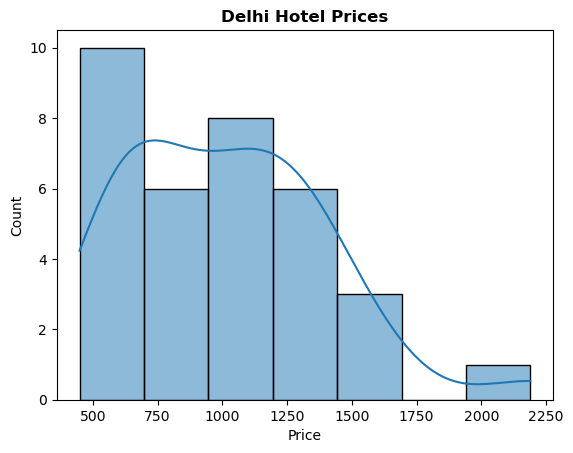

In [117]:
dlhi=df[df.City.str.contains('Delhi')]
sns.histplot(dlhi.Price,kde=True)
plt.title('Delhi Hotel Prices',weight='bold')
plt.show()

# Kolkata Hotel Prices

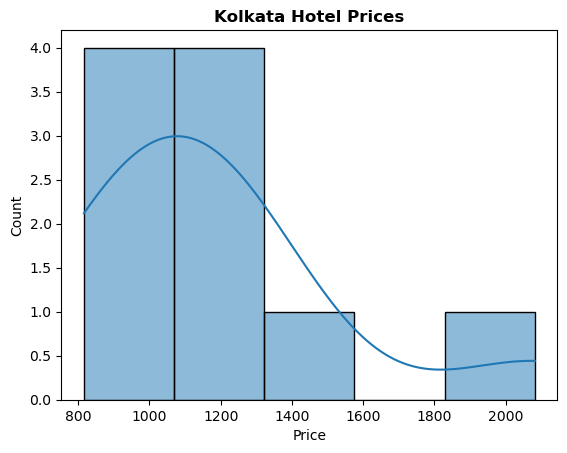

In [118]:
klkata=df[df.City.str.contains('Kolkata')]
sns.histplot(klkata.Price,kde=True)
plt.title('Kolkata Hotel Prices',weight='bold')
plt.show()

# Mumbai Hotel Prices

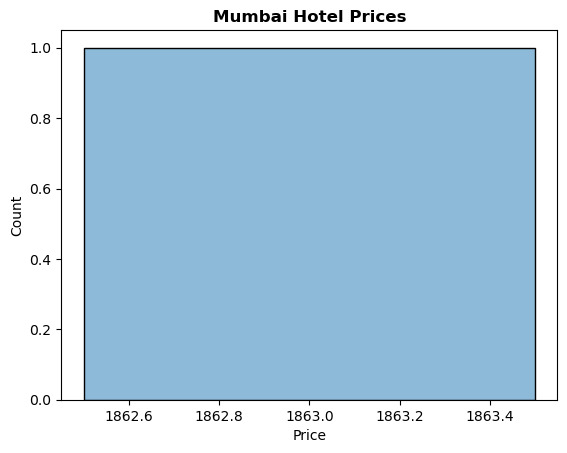

In [119]:
mumbai=df[df.City.str.contains('Mumbai')]
sns.histplot(mumbai.Price,kde=True)
plt.title('Mumbai Hotel Prices',weight='bold')
plt.show()

# ****PLotting Prices and Rating on India's Map

In [120]:
dat=pd.read_csv('/kaggle/input/oyo-hotel-rooms/OYO_HOTEL_ROOMS.csv')
dat.head()

,Unnamed: 0,Hotel_name,Location,Price,Discount,Rating
0,0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819.0,65% off,104.0
1,1,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702.0,65% off,410.0
2,2,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289.0,64% off,879.0
3,3,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094.0,66% off,75.0
4,4,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.0,65% off,686.0


In [121]:
indian_states = gpd.read_file('/kaggle/input/india-gis-data/India States/Indian_states.shp')
indian_states.columns

Index(['st_nm', 'geometry'], dtype='object')

In [122]:
dat['City'] = dat['Location'].apply(lambda x: x.split(',')[0].strip())
dat.head()

,Unnamed: 0,Hotel_name,Location,Price,Discount,Rating,City
0,0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819.0,65% off,104.0,India
1,1,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702.0,65% off,410.0,Chembur East
2,2,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289.0,64% off,879.0,Andheri East
3,3,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094.0,66% off,75.0,Andheri East
4,4,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.0,65% off,686.0,Near Asalpha Metro Station


# Average Prices by City

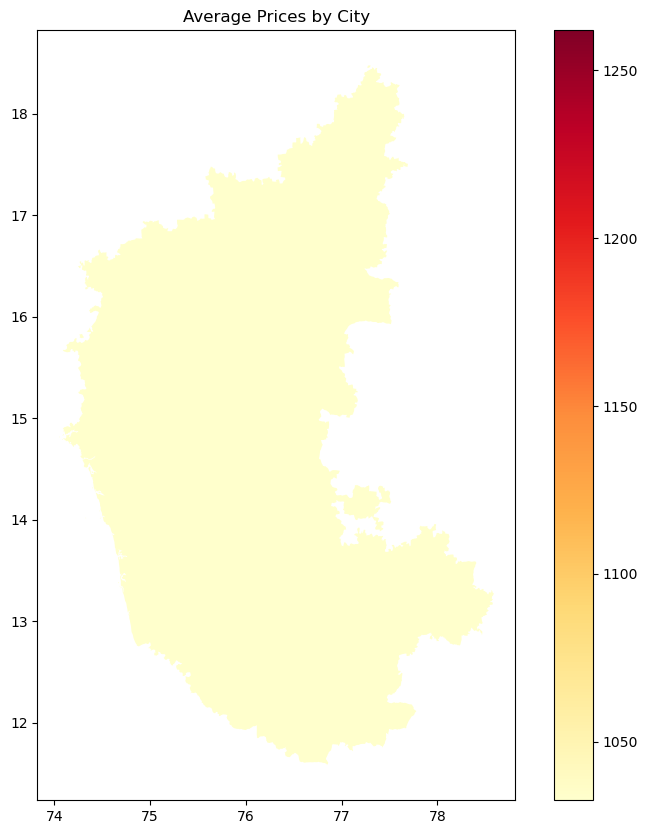

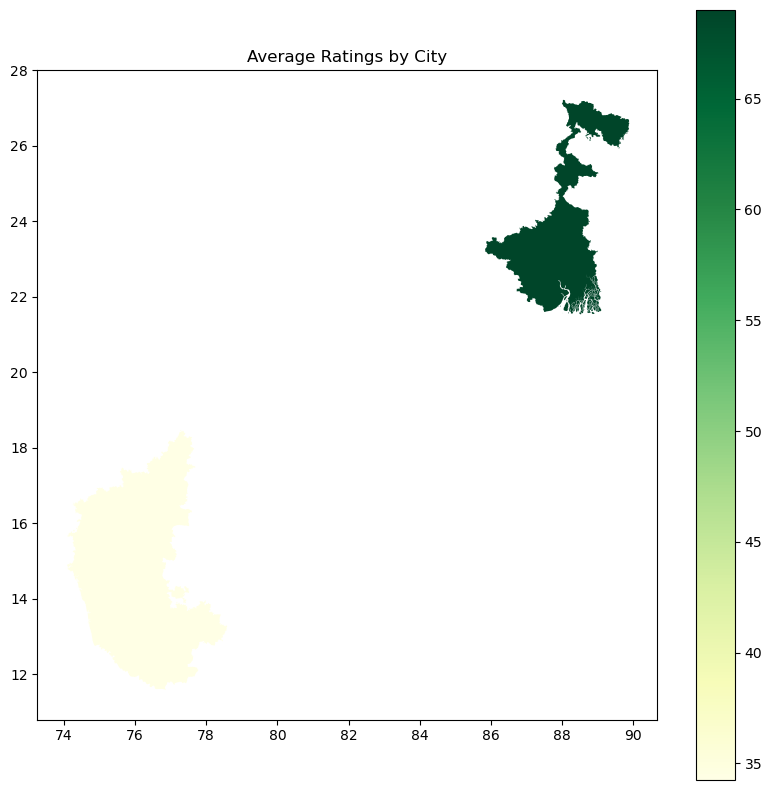

In [124]:
city_data = dat[['City', 'Price', 'Rating']]

# Create a GeoDataFrame from the city data (without geometry)
gdf_city = gpd.GeoDataFrame(city_data)

# Merge the city data GeoDataFrame with the 'indian_states' GeoDataFrame based on city names
merged_data = indian_states.merge(gdf_city, left_on='st_nm', right_on='City', how='inner')


# Group data by city and calculate mean prices and ratings
grouped_data = dat.groupby('City').agg({'Price': 'mean', 'Rating': 'mean'}).reset_index()

# Merge the aggregated data with the 'indian_states' GeoDataFrame based on city names
merged_data = indian_states.merge(grouped_data, left_on='st_nm', right_on='City', how='inner')

# Plot the map with average prices
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='Price', cmap='YlOrRd', legend=True, ax=ax)
ax.set_title('Average Prices by City')
plt.show()

# Plot the map with average ratings
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='Rating', cmap='YlGn', legend=True, ax=ax)
ax.set_title('Average Ratings by City')
plt.show()


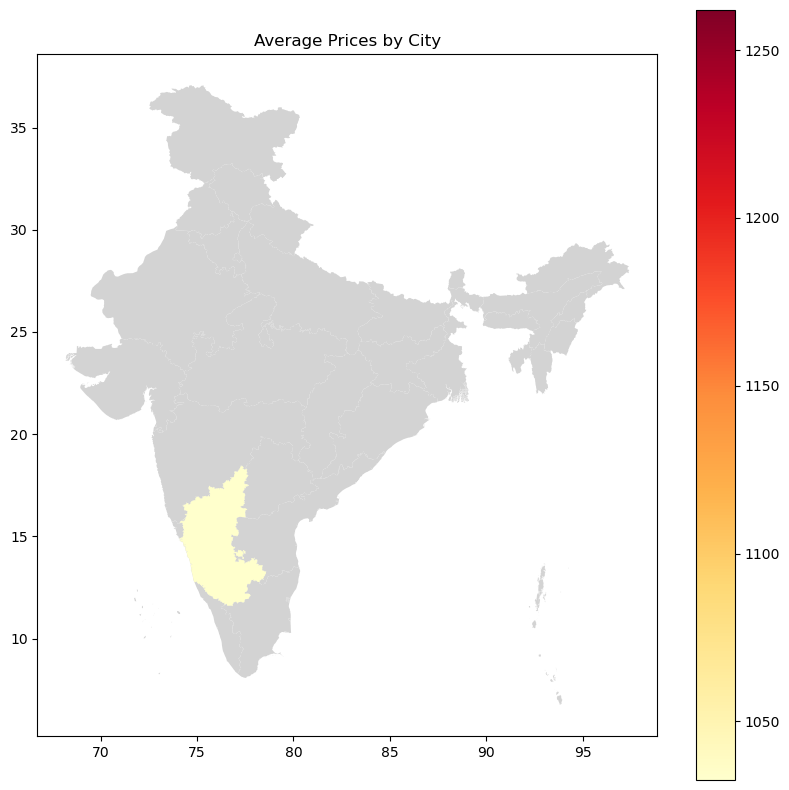

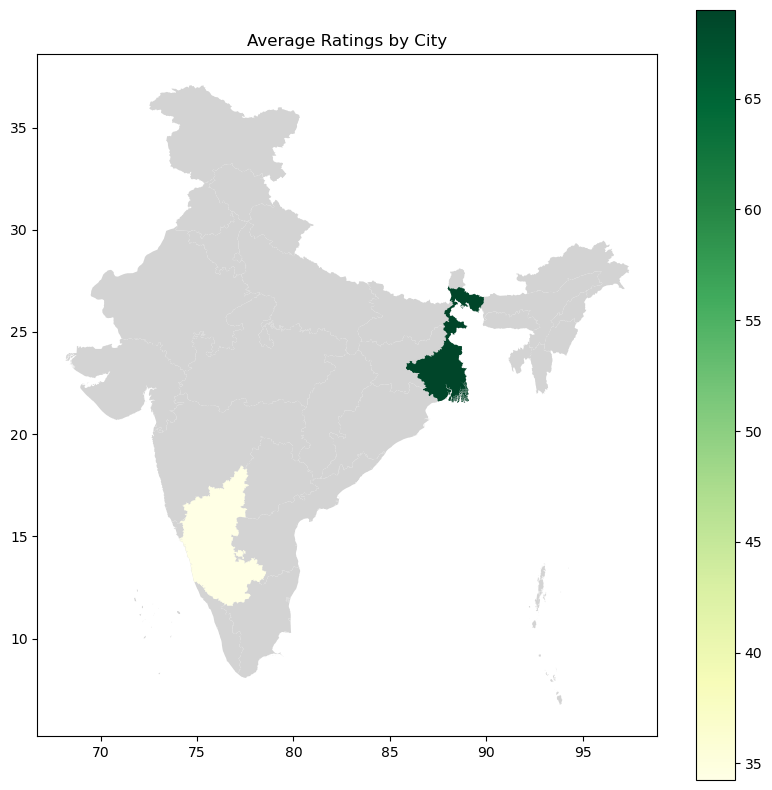

In [126]:

grouped_data = dat.groupby('City').agg({'Price': 'mean', 'Rating': 'mean'}).reset_index()

# Merge the aggregated data with the 'indian_states' GeoDataFrame based on city names
indian_states_with_data = indian_states.merge(grouped_data, left_on='st_nm', right_on='City', how='inner')

# Plot the map with cities, prices, and ratings
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
indian_states.plot(ax=ax, color='lightgrey')
indian_states_with_data.plot(column='Price', cmap='YlOrRd', legend=True, ax=ax)
ax.set_title('Average Prices by City')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
indian_states.plot(ax=ax, color='lightgrey')
indian_states_with_data.plot(column='Rating', cmap='YlGn', legend=True, ax=ax)
ax.set_title('Average Ratings by City')
plt.show()
